In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
raw_data = pd.read_csv("Car-sales.csv")
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### Preprocessing

In [6]:
raw_data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [7]:
data = raw_data.drop(['Model'], axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [8]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [10]:
data_no_mv = data.dropna(axis=0)
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


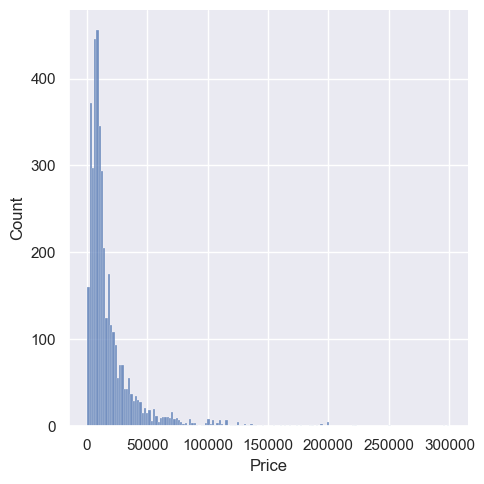

In [29]:
sns.displot(data_no_mv['Price'])

As there are lot of outliers in the data to deal with them we can either remove the top 1% of the data or 

can be achieved using :
1. quantile method (i.e, DataFrame.quantile(the qunatile)) return the value at the given quantile (=np.percentile)

#### Dealing with Outliers

In [15]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv["Price"]<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


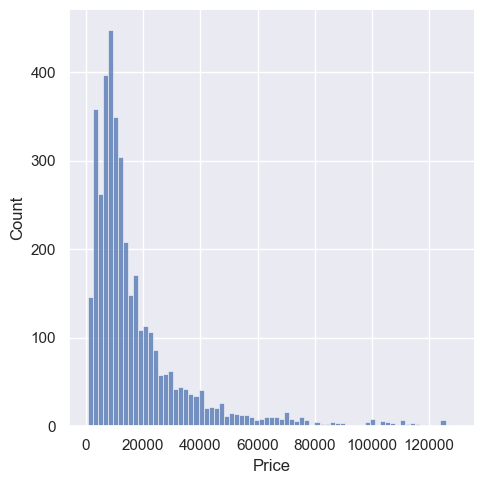

In [16]:
sns.displot(data_1['Price'])

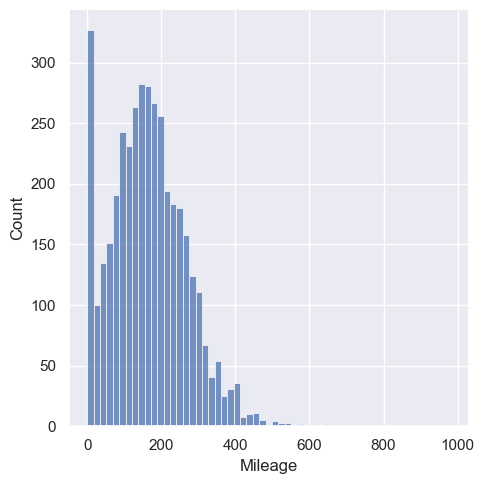

In [17]:
sns.displot(data_1['Mileage'])

In [18]:
q = data_1['Mileage'].quantile(0.99)
data2 = data_1[data_1['Mileage']<q]

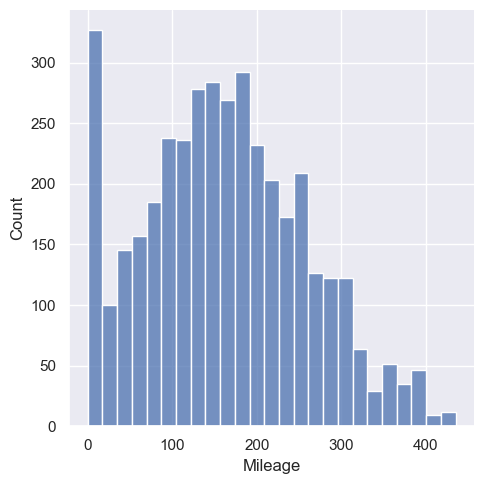

In [19]:
sns.displot(data2['Mileage'])

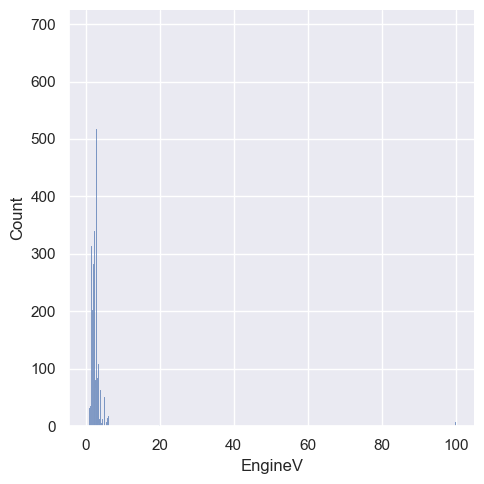

In [20]:
sns.displot(data_no_mv['EngineV'])

In [21]:
data3 = data2[data2['EngineV']<6.5]

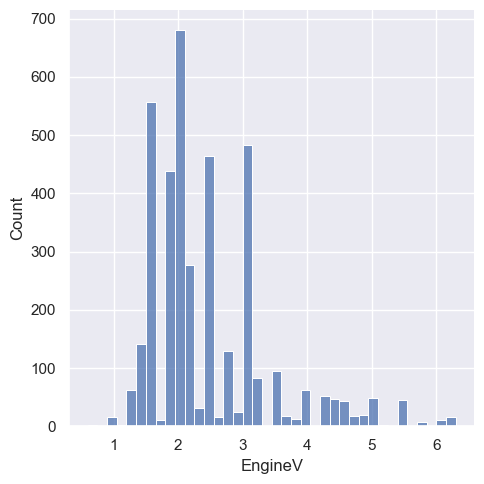

In [22]:
sns.displot(data3['EngineV'])

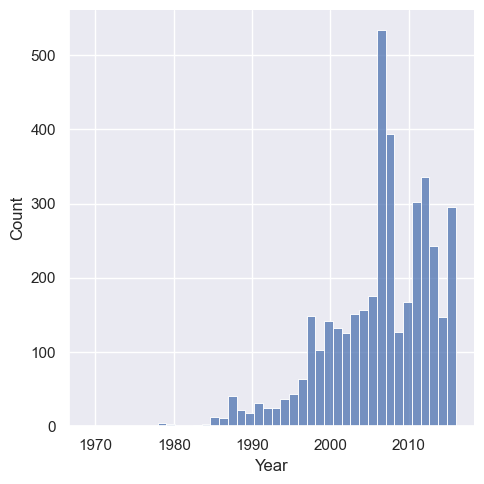

In [23]:
sns.displot(data_no_mv['Year'])

In [24]:
q = data3['Year'].quantile(0.01)
data4 = data3[data3['Year']>q]

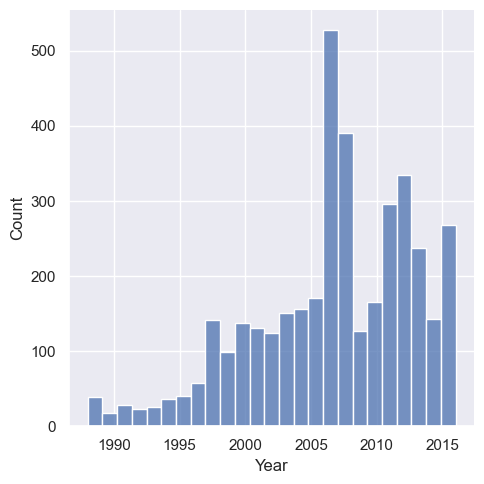

In [25]:
sns.displot(data4['Year'])

In [26]:
data_cleaned = data4.reset_index(drop=True)

In [27]:
data_cleaned.describe()

,Price,Mileage,EngineV,Year
count,3867.000000,3867.000000,3867.000000,3867.000000
mean,18194.455679,160.542539,2.450440,2006.709853
std,19085.855165,95.633291,0.949366,6.103870
min,800.000000,0.000000,0.600000,1988.000000
25%,7200.000000,91.000000,1.800000,2003.000000
50%,11700.000000,157.000000,2.200000,2008.000000
75%,21700.000000,225.000000,3.000000,2012.000000
max,129222.000000,435.000000,6.300000,2016.000000


### Checking OLS assumptions

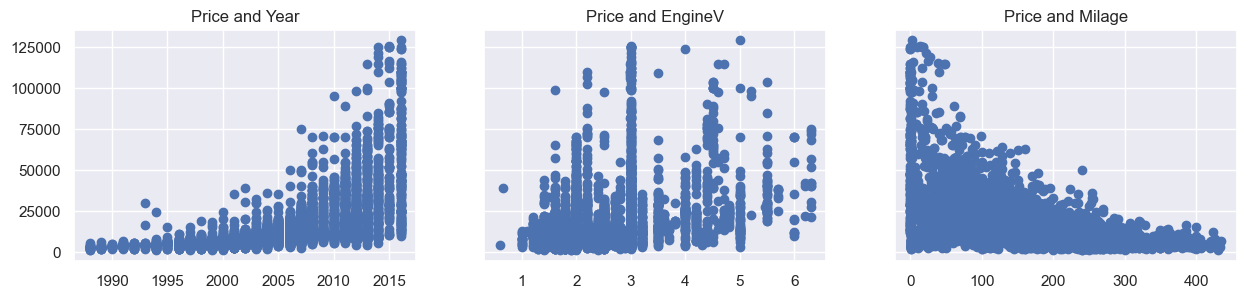

In [30]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title("Price and Year")
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title("Price and EngineV")
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title("Price and Milage")

plt.show()

As the relation of Price with other variables is not linear and hence we cannot implement the concept of LinearRegression. From the above graphs it can be easily seen the relation of Price with other varibles is exponential, to overcome such issues Log transformation can be applied.
Log transformation are especially useful when facing exponential relationship

In [34]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_Price'] = log_price
data_cleaned = data_cleaned.drop(['Price'], axis=1)
data_cleaned

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_Price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


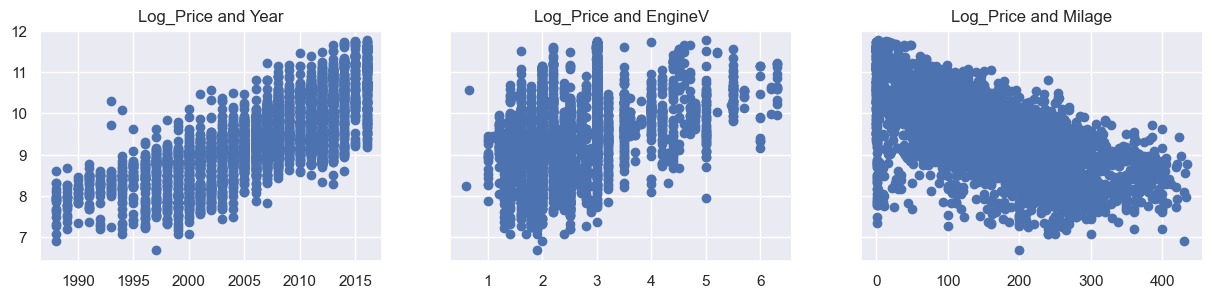

In [32]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_Price'])
ax1.set_title("Log_Price and Year")
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_Price'])
ax2.set_title("Log_Price and EngineV")
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_Price'])
ax3.set_title("Log_Price and Milage")

plt.show()

One of the best way to check Multicollinearity if thriugh VIF(Variance Inflation factor)
VIF produces a measure which estimates how much larger the squared root of the standard error of an estimate is, comapred to a sitation where the variable was completely uncorrelated with the other predictors.

If VIF = 1 : no multicollinearity (it is also the minimum value of the measure) <br>
1 < VIF < 5 : perfectly okay <br>
5 < VIF < 10 : question <br>
10 < VIF < 20 : unacceptable <br>

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [38]:
data_no_multicollinearity = data_cleaned.drop(['Year'], axis=1)

### Create Dummy Variable

In [42]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)
data_with_dummies.describe(include='all')

,Mileage,EngineV,log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
count,3867.000000,3867.000000,3867.000000,3867,3867,3867,3867,3867,3867,3867,3867,3867,3867,3867,3867,3867,3867,3867
unique,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
freq,NaN,NaN,NaN,3243,3112,3565,3435,3369,3019,3614,3497,2400,3495,3257,3299,3768,2474,3505
mean,160.542539,2.450440,9.415703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,95.633291,0.949366,0.876616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.600000,6.684612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,91.000000,1.800000,8.881836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,157.000000,2.200000,9.367344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,225.000000,3.000000,9.985068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# checking the VIF again after creating Dummies
variables1 = data_with_dummies[['Mileage', 'EngineV']]
vif1 = pd.DataFrame()
vif1["VIF"] = [variance_inflation_factor(variables1.values, i) for i in range(variables1.shape[1])]
vif1["Features"] = variables1.columns
vif1

,VIF,Features
0,2.805214,Mileage
1,2.805214,EngineV


In [44]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [47]:
# Rearranging the dataset
cols = ['log_Price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
data_preprocessed = data_with_dummies[cols]

### Linear Regression Model

In [48]:
targets = data_preprocessed['log_Price']
inputs = data_preprocessed.drop(['log_Price'], axis=1)

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [51]:
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

#### Create the Regression

In [54]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [55]:
y_hat = reg.predict(x_train)

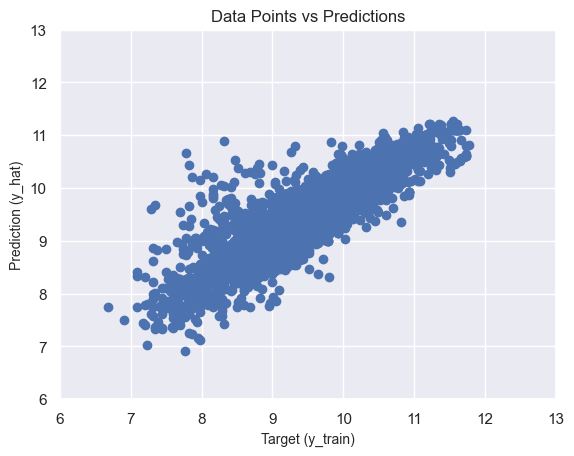

In [58]:
plt.scatter(y_train, y_hat)
plt.xlabel("Target (y_train)", size=10)
plt.ylabel("Prediction (y_hat)", size=10)
plt.title("Data Points vs Predictions")
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals')

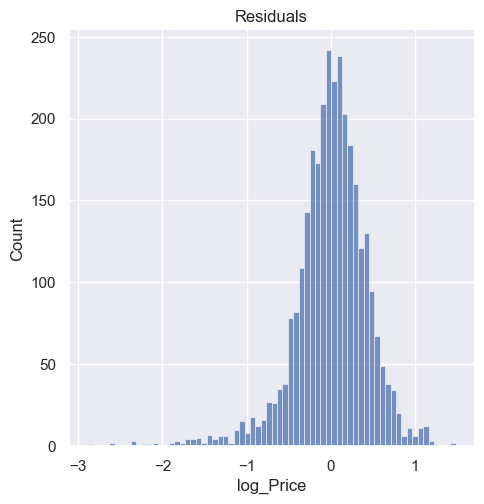

In [59]:
sns.displot(y_train-y_hat)
plt.title('Residuals')

In [60]:
reg.score(x_train,y_train)

0.744996578792662

#### Finding the weights and bias

In [61]:
reg.intercept_

9.415239458021299

In [63]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [65]:
reg_summary = pd.DataFrame(data=inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


Weights Interpretation<br>
1. A positive weight shows that as a features increases in value <br>
2. A negative weight shows that as a feature decreases in value <br>

Dummy Variables:
1. A positive weight shows that the respective category(Brand) is more expensive than the benchmark(Audi) <br>
2. A negative weight shows that the respective category(Brand) is less expensive than the benchmark(Audi) <br>

In [ ]:
data_cleaned['Body'].unique()
# Here crossover is the benchmark

In [ ]:
data_cleaned['Engine Type'].unique()
# Here Diesel is the benchmark

### Testing

In [70]:
y_hat_test = reg.predict(x_test)

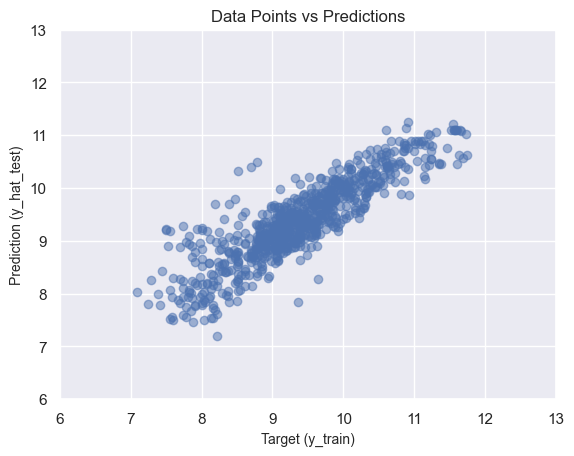

In [72]:
plt.scatter(y_test, y_hat_test, alpha=.5)
plt.xlabel("Target (y_train)", size=10)
plt.ylabel("Prediction (y_hat_test)", size=10)
plt.title("Data Points vs Predictions")
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [73]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=["Prdiction"])
y_test = y_test.reset_index(drop=True)
df_pf["Target"] = np.exp(y_test)
df_pf

,Prdiction,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0
...,...,...
769,29651.726363,29500.0
770,10732.071179,9600.0
771,13922.446953,18300.0
772,27487.751303,68500.0


In [74]:
df_pf["Residual"] = df_pf["Prdiction"] - df_pf["Target"]
df_pf["Difference%"] = np.absolute(df_pf["Residual"]/df_pf["Target"]*100)
df_pf

,Prdiction,Target,Residual,Difference%
0,10685.501696,2300.0,8385.501696,364.587030
1,3499.255242,2800.0,699.255242,24.973402
2,7553.285218,2500.0,5053.285218,202.131409
3,7463.963017,6400.0,1063.963017,16.624422
4,11353.490075,9150.0,2203.490075,24.081859
...,...,...,...,...
769,29651.726363,29500.0,151.726363,0.514327
770,10732.071179,9600.0,1132.071179,11.792408
771,13922.446953,18300.0,-4377.553047,23.921055
772,27487.751303,68500.0,-41012.248697,59.871896


In [78]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=["Difference%"])

,Prdiction,Target,Residual,Difference%
698,30480.85,30500.00,-19.15,0.06
742,16960.31,16999.00,-38.69,0.23
60,12469.21,12500.00,-30.79,0.25
110,25614.14,25500.00,114.14,0.45
367,42703.68,42500.00,203.68,0.48
369,3084.69,3100.00,-15.31,0.49
769,29651.73,29500.00,151.73,0.51
272,9749.53,9800.00,-50.47,0.52
714,23118.07,22999.00,119.07,0.52
630,8734.58,8800.00,-65.42,0.74


In [79]:
df_pf.describe(include='all')

,Prdiction,Target,Residual,Difference%
count,774.00,774.00,774.00,774.00
mean,15946.76,18165.82,-2219.06,36.26
std,13133.20,19967.86,10871.22,55.07
min,1320.56,1200.00,-85106.16,0.06
25%,7413.64,6900.00,-3147.34,12.11
50%,11568.17,11600.00,-142.52,23.47
75%,20162.41,20500.00,2044.19,39.56
max,77403.06,126000.00,29456.50,512.69


<small>Therefore, from the above description of the final prediction we find that the model is not much great as the min difference is around 0.06 where as the max difference is of 513 which is depleting the stablity of the model.<small/>